# Result_Fig4_1 : Salary CID

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')

sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
import json
import pandas as pd
from utils.salary import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from constants import CONSTANTS
import numpy as np



 

In [3]:
output_dir = './fig/'

In [4]:
# test.json 내용: [{"name":"Jack","age":26},{"name":"Ace","age":87}]
df = pd.read_json(f'{CONSTANTS.data_availability_dir}/result/tag/salary.json') ## pd.read_json 이용

In [5]:
tag_info = load_json(f"{CONSTANTS.data_availability_dir}/result/tag/tag_info.json")

In [6]:
df = df.reset_index().rename(columns={'index':'year'})
df = df.sort_values(by = 'year').reset_index(drop=True)

In [7]:
def get_CID_ratio_rel_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    valid_langs = df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index
    filtered_df = df_salary[df_salary['lang'].isin(valid_langs)].copy()

    filtered_df.sort_values(by=['lang', 'year'], inplace=True)
    filtered_df['growth_rate'] = filtered_df.groupby('lang')['salary'].pct_change()

    filtered_df['CID'] = filtered_df.groupby('lang')['growth_rate'].diff()
    filtered_df['CID'] = filtered_df.groupby('lang')['CID'].diff()

    filtered_df = filtered_df.dropna(subset=['growth_rate', 'CID']).reset_index(drop=True)


    return filtered_df




In [8]:
def filter_df( df, type ) :
    tot_filtered_df = pd.DataFrame()
    for year in [ 2022, 2023, 2024] : 
        filtered_df = get_CID_ratio_rel_df(df, year)    
        tot_filtered_df = pd.concat([tot_filtered_df, filtered_df], axis = 0)
    
        tot_exist_df = tot_filtered_df[tot_filtered_df['lang'].isin(tot_filtered_df['lang'].value_counts()[lambda x: x == len([ 2022, 2023, 2024])].index)].copy()
        tot_exist_df=  tot_exist_df.sort_values(by = ['year', 'CID'], ascending=[False, True])
    return tot_exist_df

In [9]:
tot_df_rl = filter_df(df, 'ratio_rel')

[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]


In [ ]:
def draw_bar_graph_for_df_recc(df):
    
    colors = {
        2022: '#4b9ed3',  # muted blue
        2023: '#ee9044',  # soft orange
        2024: '#4da962'   # balanced green
    }

    lang = (
        df[df['year'] == 2024]
        .sort_values(by='CID', ascending=True)['lang']
        .values
    )
    years = [2022, 2023, 2024]
    CID_dict = {year: df.loc[(df['year'] == year) & (df['lang'].isin(lang)), 'CID'].values for year in years}

    x = np.arange(len(lang))

    fig, ax = plt.subplots(figsize=(14, 4.5), dpi=300, constrained_layout=True)

    width = 0.25
    gap = width / 2

    ax.bar(x - width - gap, CID_dict[2022], width=width, color=colors[2022], label='2022', alpha=0.9)
    ax.bar(x - gap, CID_dict[2023], width=width, color=colors[2023], label='2023', alpha=0.9)
    ax.bar(x + gap, CID_dict[2024], width=width, color=colors[2024], label='2024', alpha=0.9)

    ax.axhline(y=0, color='black', linewidth=0.8)

    ax.set_xticks(x)
    ax.set_xticklabels(lang, rotation=45, ha='right', fontsize=11)  # 🔹 x축 tick font
    ax.set_ylabel('CID of salary growth', fontsize=13, labelpad=6)  # 🔹 y축 라벨
    ax.tick_params(axis='y', labelsize=11)  # 🔹 y축 눈금 폰트
    ax.tick_params(axis='x', pad=3)

    ax.grid(axis='y', linestyle='--', alpha=0.25, linewidth=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.spines['left'].set_color('#555555')
    ax.spines['bottom'].set_color('#555555')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles=handles,
        labels=labels,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.07),
        ncol=3,
        fontsize=11,   
        frameon=False
    )
    plt.savefig(f"{output_dir}/C_Result_Fig4_1.png", dpi=300, bbox_inches='tight')
    plt.show()


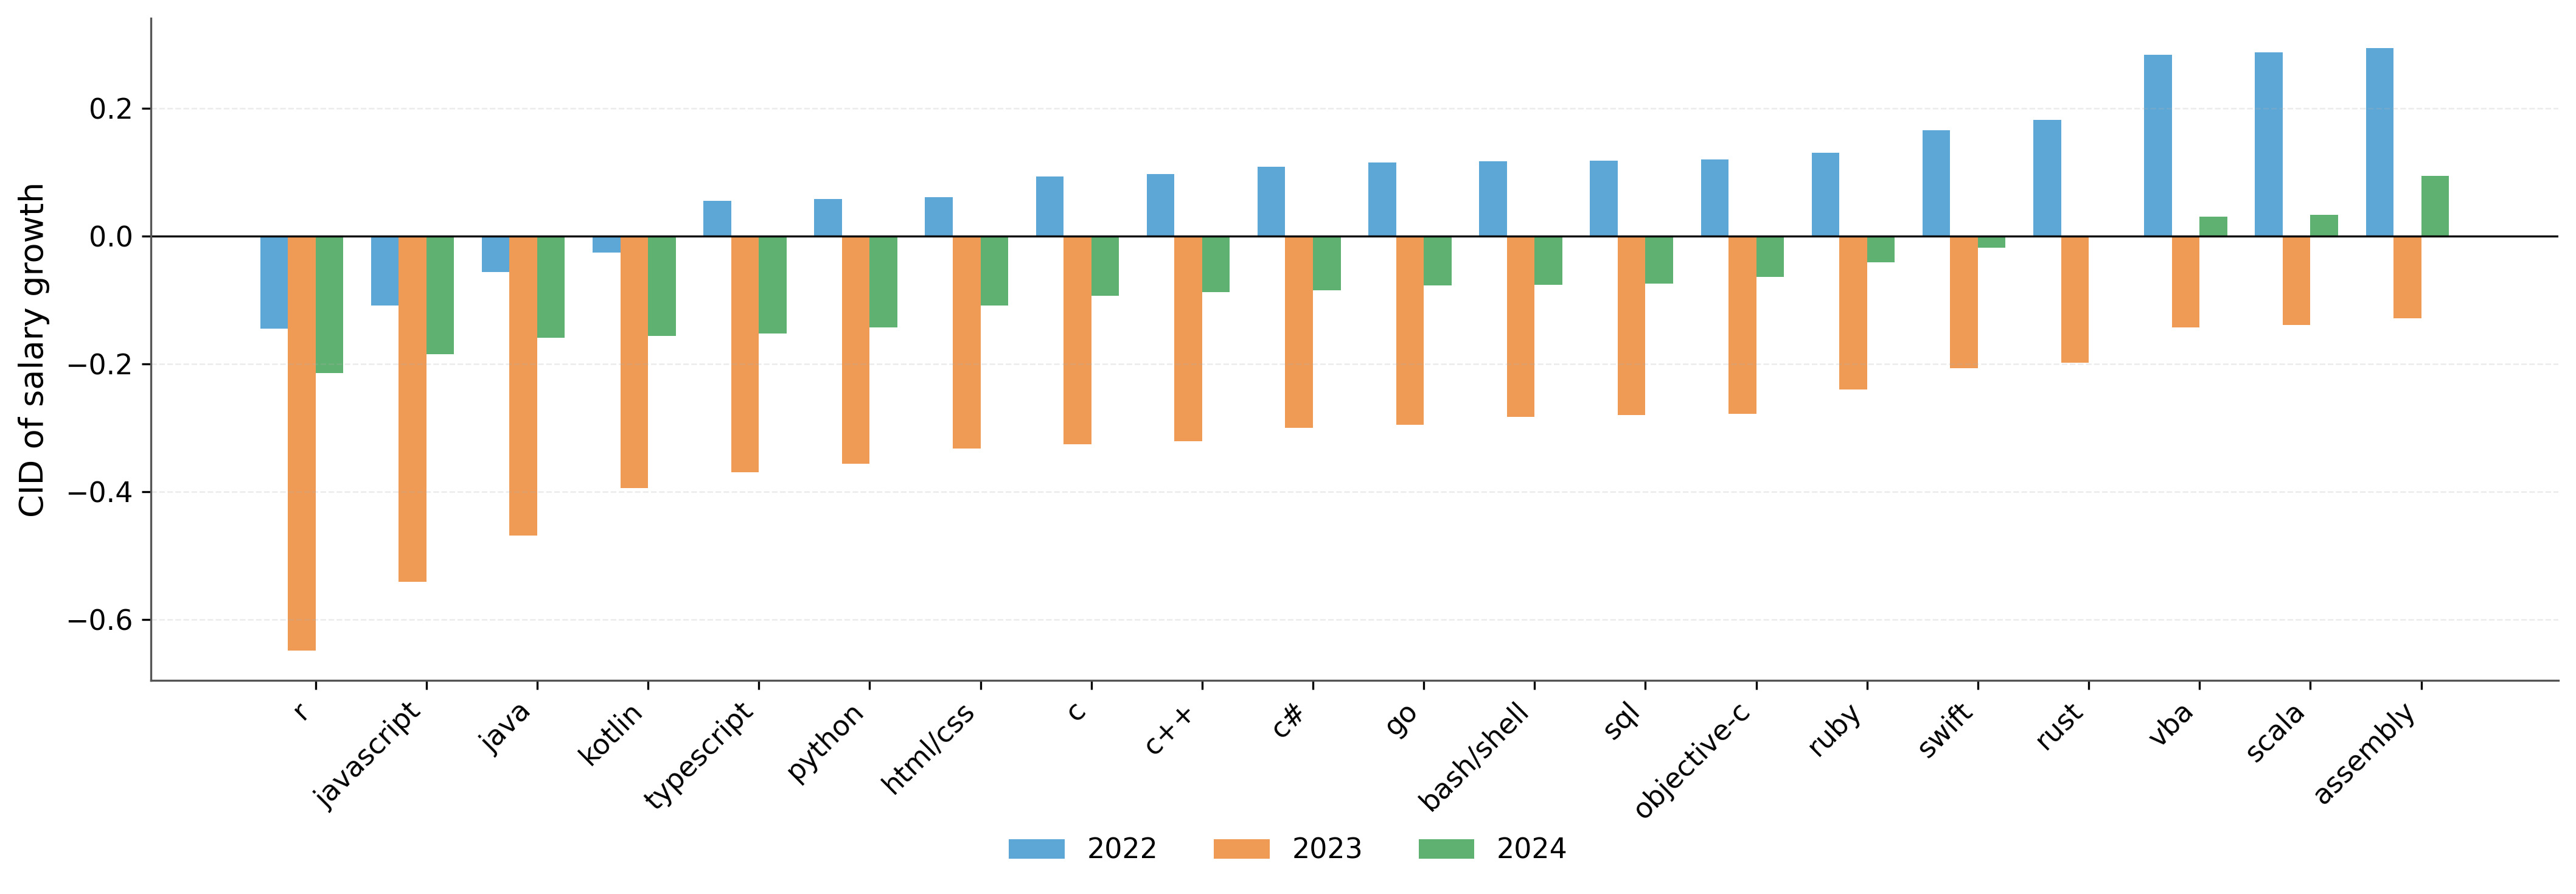

In [11]:
draw_bar_graph_for_df_recc(tot_df_rl)